In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve

In [ ]:
file_path = "data_model_preprocessing-PBA.csv"

# Load the dataset
df = pd.read_csv(file_path)
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122557 entries, 0 to 122556
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   WeekendOrder                   122557 non-null  int64  
 1   Processing.Days                122557 non-null  float64
 2   Distance_km                    122557 non-null  float64
 3   `Order Item Product Price`     122557 non-null  float64
 4   `Order Item Quantity`          122557 non-null  int64  
 5   `Order Item Discount Rate`     122557 non-null  float64
 6   `Order Region`Caribbean        122557 non-null  int64  
 7   `Order Region`Central Africa   122557 non-null  int64  
 8   `Order Region`Central America  122557 non-null  int64  
 9   `Order Region`East Africa      122557 non-null  int64  
 10  `Order Region`East of USA      122557 non-null  int64  
 11  `Order Region`Eastern Asia     122557 non-null  int64  
 12  `Order Region`Eastern Europe  

In [ ]:
# Target column
target = "Late_delivery_risk"

# droping the target column
X = df.drop(columns=[target])

# Target (y)
y = df[target]

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      
    random_state=42,  
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Features shape: (122557, 30)
Target shape: (122557,)
Train size: (98045, 30)
Test size: (24512, 30)


In [27]:
# Create a pipeline for Logistic Regression
log_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=1000))
])

# Training the model
log_reg_pipeline.fit(X_train, y_train)

# Predict labels
y_pred = log_reg_pipeline.predict(X_test)

# Predict probabilities for ROC-AUC
y_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]

#  Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

cm = confusion_matrix(y_test, y_pred)


Logistic Regression Performance:
Accuracy: 0.9505956266318538
Precision: 0.9566385551160534
Recall: 0.9531528851873885
F1-score: 0.9548925392036354
ROC-AUC: 0.9727919810992062



Baseline KNN Performance:
Accuracy: 0.9435378590078329
Precision: 0.9362163725773792
Recall: 0.9626710291493159
F1-score: 0.949259422202669
ROC-AUC: 0.9714558041085277


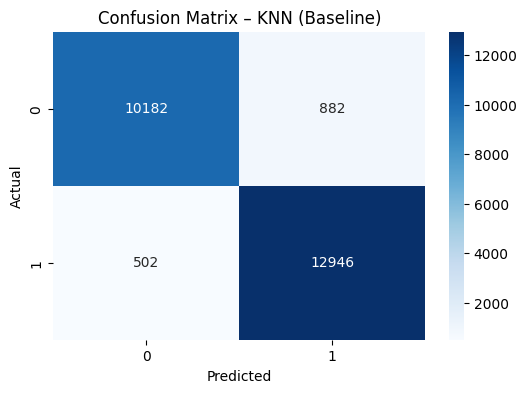

In [ ]:
# BASELINE KNN CONFUSION MATRIX
baseline_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))  
])

baseline_knn.fit(X_train, y_train)
y_pred_knn_base = baseline_knn.predict(X_test)

cm_knn_base = confusion_matrix(y_test, y_pred_knn_base)

y_prob_knn_base = baseline_knn.predict_proba(X_test)[:, 1]

accuracy_base = accuracy_score(y_test, y_pred_knn_base)
precision_base = precision_score(y_test, y_pred_knn_base)
recall_base = recall_score(y_test, y_pred_knn_base)
f1_base = f1_score(y_test, y_pred_knn_base)
roc_auc_base = roc_auc_score(y_test, y_prob_knn_base)

print("\nBaseline KNN Performance:")
print("Accuracy:", accuracy_base)
print("Precision:", precision_base)
print("Recall:", recall_base)
print("F1-score:", f1_base)
print("ROC-AUC:", roc_auc_base)



In [ ]:
# Defining the pipeline with GridSearch
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# hyperparameter for gridsearch
param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11, 13, 15],
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan"]
}

# setup for Gridsearch
grid_knn = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

print("Best KNN Model:", grid_knn.best_params_)
print("Best Accuracy (CV):", grid_knn.best_score_)


Best KNN Model: {'knn__metric': 'manhattan', 'knn__n_neighbors': 15, 'knn__weights': 'distance'}
Best Accuracy (CV): 0.9510530878678157


In [ ]:
# Predicing labels
y_pred_knn = best_knn.predict(X_test)

# Predicting probabilities for ROC-AUC
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

print("KNN Model Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)
print("ROC-AUC:", roc_auc_knn)


KNN Model Performance:
Accuracy: 0.9507588120104439
Precision: 0.942648441455124
Recall: 0.969214753123141
F1-score: 0.9557470210815765
ROC-AUC: 0.976088522384285


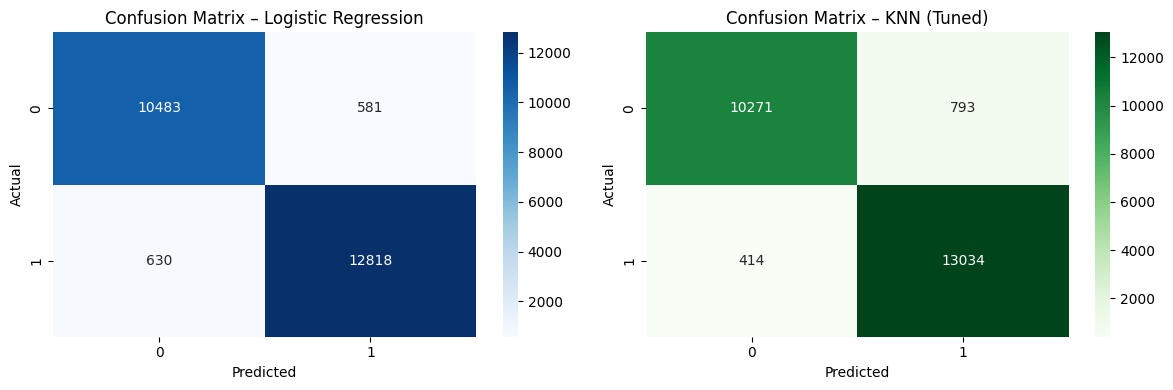

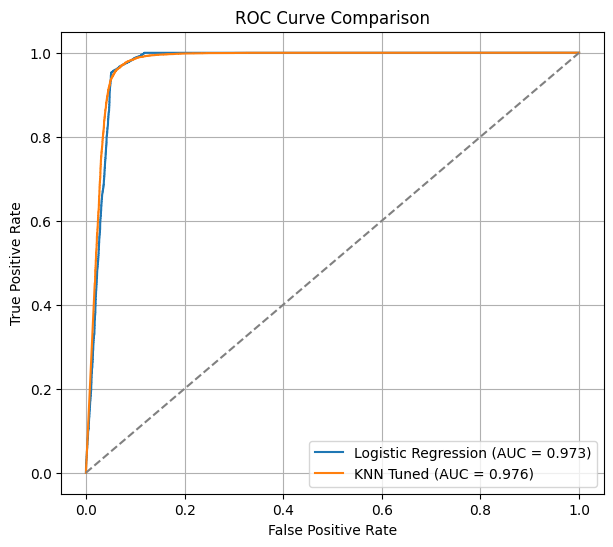

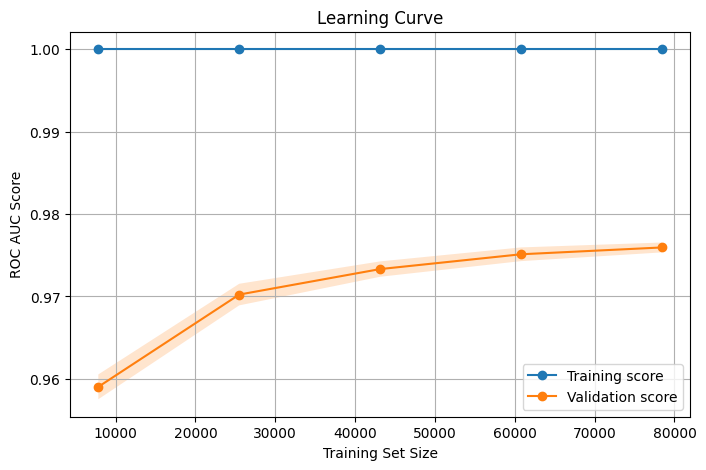

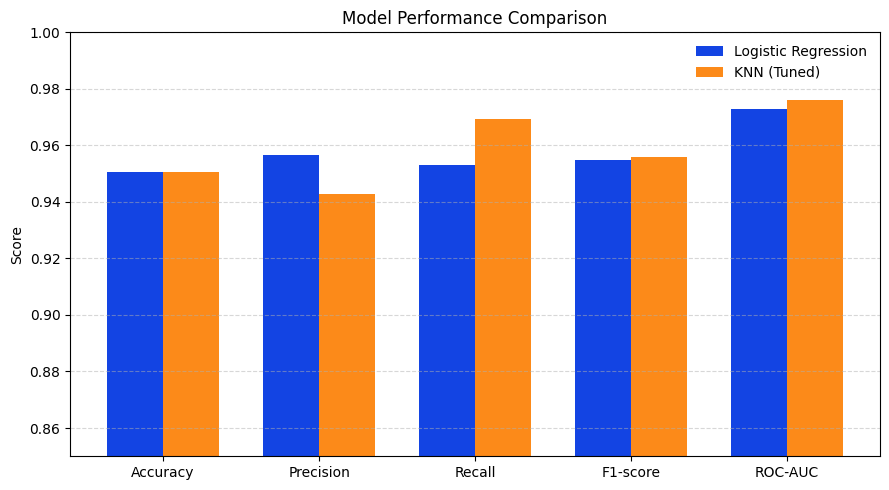

In [28]:
# Logistic Regression vs KNN (Tuned)
cm_knn = confusion_matrix(y_test, y_pred_knn)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Logistic Regression
sns.heatmap(
    cm,                     
    annot=True,
    fmt="d",
    cmap="Blues",
    ax=axes[0]
)
axes[0].set_title("Confusion Matrix – Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Tuned KNN
sns.heatmap(
    cm_knn,                 
    annot=True,
    fmt="d",
    cmap="Greens",
    ax=axes[1]
)
axes[1].set_title("Confusion Matrix – KNN (Tuned)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


#ROC Curve

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob)
roc_auc_lr = roc_auc

# KNN ROC (already computed)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn_val = roc_auc_knn

plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.3f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN Tuned (AUC = {roc_auc_knn_val:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="grey")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#LEARNING CURVE: ROC-AUC vs Training Set Size

train_sizes, train_scores, val_scores = learning_curve(
    best_knn,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

plt.figure(figsize=(8,5))

plt.plot(train_sizes, train_mean, 'o-', label="Training score")
plt.plot(train_sizes, val_mean, 'o-', label="Validation score")

plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2
)

plt.fill_between(
    train_sizes,
    val_mean - val_std,
    val_mean + val_std,
    alpha=0.2
)

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("ROC AUC Score")
plt.legend()
plt.grid(True)
plt.show()

# MODEL PERFORMANCE COMPARISON
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

lr_scores = [accuracy, precision, recall, f1, roc_auc]
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn]

x = np.arange(len(metrics))
bar_width = 0.36

plt.figure(figsize=(9,5))

plt.bar(
    x - bar_width/2,
    lr_scores,
    bar_width,
    label="Logistic Regression",
    color="#1344E3"   # orange
)

plt.bar(
    x + bar_width/2,
    knn_scores,
    bar_width,
    label="KNN (Tuned)",
    color="#FC8A19"   # bright green
)

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.ylim(0.85, 1.0)

plt.legend(frameon=False)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

